In [1]:
import matplotlib.pyplot as plt

In [2]:
from keras import optimizers

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
from keras.applications import VGG16

In [5]:
import numpy as np

In [6]:
import os

In [7]:
from keras import layers

In [8]:
from keras import models
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [9]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [10]:
original_dataset_dir = 'C:/Users/Welcome/Dogs Emotion Recognition/Dogs_Emotion_Recognition_Dataset'
base_dir = 'C:/Users/Welcome/Dogs Emotion Recognition/Dogs_Emotion_Recognition_Dataset'

In [11]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [12]:
datagen = ImageDataGenerator(rescale=1. / 255)
batch_size = 20

In [13]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count, 4))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical'
    )
    i = 0
    for input_batch, labels_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [14]:
train_features, train_labels = extract_features(train_dir, 300)
validation_features, validation_labels = extract_features(validation_dir, 100)
test_features, test_labels = extract_features(test_dir, 100)


Found 1200 images belonging to 4 classes.
1/1 [==============================] - 6s 6s/step
Found 400 images belonging to 4 classes.
1/1 [==============================] - 6s 6s/step
Found 400 images belonging to 4 classes.
1/1 [==============================] - 7s 7s/step


In [15]:
train_features = np.reshape(train_features, (300, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (100, 4 * 4 * 512))
test_features = np.reshape(test_features, (100, 4 * 4 * 512))


model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
# model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

history = model.fit(
    train_features, train_labels,
    epochs=30,
    validation_data=(validation_features, validation_labels)
)
model.save('doggos-imagenet-1.h5')

C:\Users\Welcome\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
10/10 [==============================] - 4s 187ms/step - loss: 1.7069 - acc: 0.2733 - val_loss: 1.4813 - val_acc: 0.2300
Epoch 2/30
10/10 [==============================] - 1s 83ms/step - loss: 1.5435 - acc: 0.2833 - val_loss: 1.5042 - val_acc: 0.2300
Epoch 3/30
10/10 [==============================] - 1s 63ms/step - loss: 1.4534 - acc: 0.3233 - val_loss: 1.5247 - val_acc: 0.2200
Epoch 4/30
10/10 [==============================] - 1s 61ms/step - loss: 1.3956 - acc: 0.3833 - val_loss: 1.5303 - val_acc: 0.1900
Epoch 5/30
10/10 [==============================] - 1s 69ms/step - loss: 1.3087 - acc: 0.3667 - val_loss: 1.5516 - val_acc: 0.1700
Epoch 6/30
10/10 [==============================] - 1s 64ms/step - loss: 1.2852 - acc: 0.3700 - val_loss: 1.5765 - val_acc: 0.1700
Epoch 7/30
10/10 [==============================] - 1s 70ms/step - loss: 1.3124 - acc: 0.3900 - val_loss: 1.5923 - val_acc: 0.1600
Epoch 8/30
10/10 [==============================] - 1s 61ms/step - loss: 1.2310 - 

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [17]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

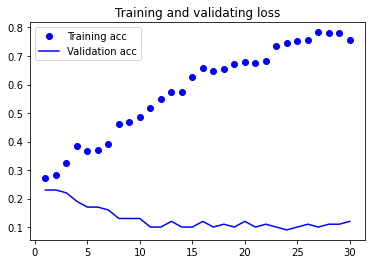

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validating loss')
plt.legend()
plt.figure()

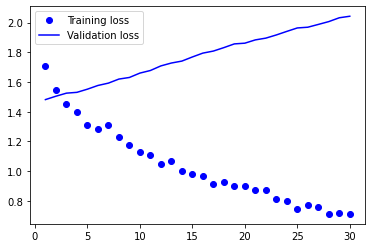

In [19]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()